In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.interpolate import interp2d, LinearNDInterpolator
import randomlatticethermalized as rlt
import movies_from_plots as mfp
import selfpropelledparticlevoronoi as sppv
import pathlib
from scipy import ndimage as nd 
import h5py as h5
import importlib

In [2]:
import topologicaltransitions as tpt
import weightedgraphanalysis as wga

In [22]:
importlib.reload(mfp)
importlib.reload(sppv)
importlib.reload(rlt)
importlib.reload(tpt)
importlib.reload(wga)

<module 'weightedgraphanalysis' from '/home/rafael/Documents/tissuewoundmodelling-main/SpringNetworkSimul/weightedgraphanalysis.py'>

# Making a network

In [ ]:
main_path = pathlib.Path().absolute()
datafileloadname = input('Name of savefile to load: ')
datafileloadname = datafileloadname + '.h5'
data_set = h5.File(str(main_path) + '/' + datafileloadname,'r')
coords = np.array(data_set['centers'])
N = np.array(data_set['number of centers'])
wloc = np.array(data_set['woundlocation'])
data_set.close()

In [23]:
vor = Voronoi(coords)
vorPointRegion = vor.point_region
vorRegions = vor.regions
vorRidges = sppv.remove_minus(vor.ridge_vertices)
vorVertices = np.array(sppv.vertices_in_bound(list(vor.vertices),5))

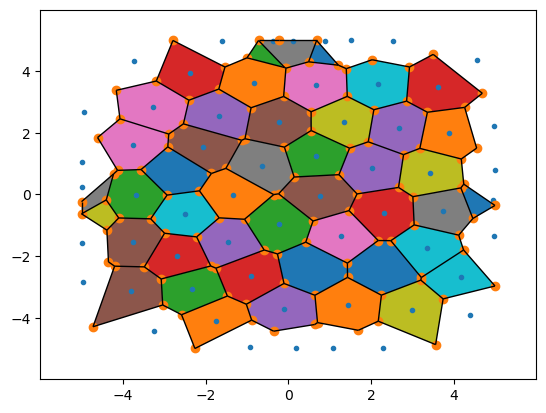

In [24]:
voronoi_plot_2d(vor)
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region if sppv.norm(vor.vertices[i]) < np.sqrt(2)*5]
        plt.fill(*zip(*polygon))

In [6]:
sppv.find_center_neighbour_center(vorRegions,vorPointRegion,2)

[32, 5, 39, 41, 46, 15, 49]

<BarContainer object of 108 artists>

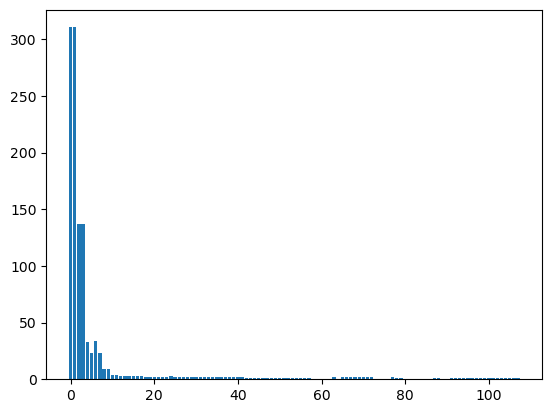

In [10]:
plt.bar(np.arange(0,len(vorVertices)),np.abs(np.linalg.eig(wga.weight_matrix(vorVertices,vorRidges))[0].round(2)))

In [11]:
G = wga.adjacency_matrix(len(vorVertices),vorRidges).round(4)

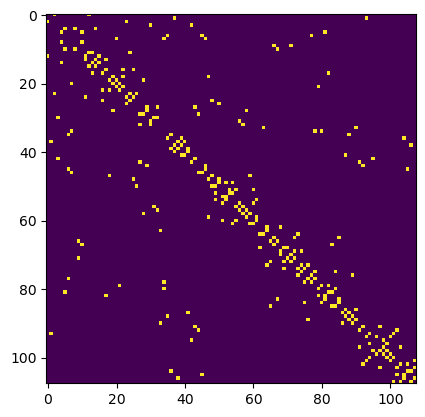

In [12]:
plt.imshow(G)

In [25]:
Bound = sppv.find_boundary_vertices(len(vorVertices),vorRidges)
Bound2 = sppv.find_wound_boundary(vorRegions,vorPointRegion,wloc)

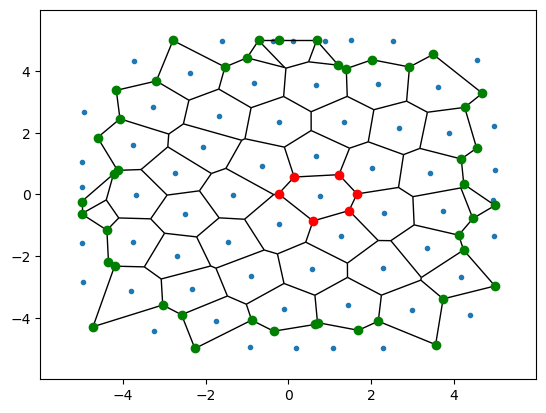

In [28]:
voronoi_plot_2d(vor,show_vertices=False)
plt.plot(vorVertices[Bound2,0],vorVertices[Bound2,1],'ro')
plt.plot(vorVertices[Bound,0],vorVertices[Bound,1],'go')
plt.show()

In [20]:
vorVertices

array([-3.32742197, -0.79029688])